<a href="https://colab.research.google.com/github/Shantanu29kumar/Stress_Detection_and_Prediction/blob/main/Stress_Detection_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [40]:
dataset = pd.read_csv('/content/drive/MyDrive/CSV files/SaYoPillow.csv')
dataset.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [41]:
dataset.head(2)

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.60,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.88,89.552,98.88,1.552,72.76,3


In [42]:
#changing the column names with suitable name 
dataset.columns=[['snoring range','respiration rate','body temperature','limb movement rate', 
            'blood oxygen levels','eye movement', 
            'number of hours of sleep', 'heart rate','Stress Levels']]

In [43]:
dataset.head()

,snoring range,respiration rate,body temperature,limb movement rate,blood oxygen levels,eye movement,number of hours of sleep,heart rate,Stress Levels
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [44]:
dataset.tail()

,snoring range,respiration rate,body temperature,limb movement rate,blood oxygen levels,eye movement,number of hours of sleep,heart rate,Stress Levels
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
629,73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


In [45]:
correl = dataset.corr()

In [46]:
correl['Stress Levels']

,Stress Levels
snoring range,0.975322
respiration rate,0.963516
body temperature,-0.962354
limb movement rate,0.971071
blood oxygen levels,-0.961092
eye movement,0.951988
number of hours of sleep,-0.973036
heart rate,0.963516
Stress Levels,1.000000


snoring range               0.975322
respiration rate            0.963516
body temperature           -0.962354
limb movement rate          0.971071
blood oxygen levels        -0.961092
eye movement                0.951988
number of hours of sleep   -0.973036
heart rate                  0.963516
Stress Levels               1.000000
Name: (Stress Levels,), dtype: float64

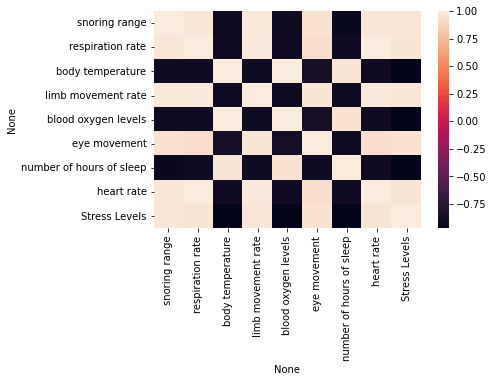

In [110]:
sns.heatmap(correl)
correl = correl.iloc[:,-1]
correl

In [47]:
X = dataset.iloc[:,:-1]
X


,snoring range,respiration rate,body temperature,limb movement rate,blood oxygen levels,eye movement,number of hours of sleep,heart rate
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12
...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32


In [48]:
Y =dataset.iloc[:,-1]
Y

0      3
1      3
2      1
3      3
4      0
      ..
625    2
626    0
627    4
628    1
629    2
Name: (Stress Levels,), Length: 630, dtype: int64

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20)


#**Selection of feature 1**

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [62]:
K_best = SelectKBest(mutual_info_classif,k=4)
feature_select1 = K_best.fit(X_train,Y_train)

In [63]:
X_train.columns[feature_select1.get_support()]


MultiIndex([(      'snoring range',),
            (   'respiration rate',),
            ('blood oxygen levels',),
            (         'heart rate',)],
           )

In [64]:
X1 = dataset[['snoring range','respiration rate','blood oxygen levels','heart rate']]
X1.head()

,snoring range,respiration rate,blood oxygen levels,heart rate
0,93.80,25.680,89.840,74.20
1,91.64,25.104,89.552,72.76
2,60.00,20.000,95.000,60.00
3,85.76,23.536,88.768,68.84
4,48.12,17.248,96.248,53.12


In [65]:
X1.tail()

,snoring range,respiration rate,blood oxygen levels,heart rate
625,69.600,20.960,90.960,62.40
626,48.440,17.376,96.376,53.44
627,97.504,27.504,84.256,78.76
628,58.640,19.728,94.592,59.32
629,73.920,21.392,91.392,63.48


In [66]:
X1.head(1)

,snoring range,respiration rate,blood oxygen levels,heart rate
0,93.8,25.68,89.84,74.2


In [67]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y,test_size = 0.20)

X1_train.head(1)


,snoring range,respiration rate,blood oxygen levels,heart rate
140,71.36,21.136,91.136,62.84


In [68]:
from sklearn.ensemble import AdaBoostClassifier


In [69]:
Model_1 = AdaBoostClassifier()
Model_1.fit(X1_train,Y1_train)

AdaBoostClassifier()

In [107]:
print('train score',Model_1.score(X1_train,Y1_train))
print('test score',Model_1.score(X1_test,Y1_test))

train score 0.5992063492063492
test score 0.5952380952380952


#**Selection of feature 2**

In [60]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif

In [113]:
SP = SelectPercentile(mutual_info_classif,percentile = 2)
feature_select2 = SP.fit(X_train,Y_train)

In [72]:
X_train.columns[feature_select2.get_support()]

MultiIndex([('snoring range',)],
           )

#**Training the model**

In [74]:
X_train.head()

,snoring range,respiration rate,body temperature,limb movement rate,blood oxygen levels,eye movement,number of hours of sleep,heart rate
315,49.800,17.920,98.880,7.840,96.920,79.20,8.920,54.80
596,98.976,28.976,88.720,18.488,86.464,103.72,0.000,82.44
543,99.296,29.296,89.120,18.648,86.944,104.12,0.000,83.24
332,51.040,18.208,94.208,8.208,92.312,80.52,5.208,55.52
584,83.000,22.800,90.400,13.000,88.400,96.00,0.400,67.00


In [75]:
X_train.head(2)

,snoring range,respiration rate,body temperature,limb movement rate,blood oxygen levels,eye movement,number of hours of sleep,heart rate
315,49.800,17.920,98.88,7.840,96.920,79.20,8.92,54.80
596,98.976,28.976,88.72,18.488,86.464,103.72,0.00,82.44


In [76]:
Model_2 = AdaBoostClassifier()
Model_2.fit(X_train,Y_train)

AdaBoostClassifier()

In [77]:
print('train score',Model_2.score(X_train,Y_train))
print('test score',Model_2.score(X_test,Y_test))

train score 0.6150793650793651
test score 0.5317460317460317


#**Importance of feature and training the model again**

In [78]:
Imp = Model_2.feature_importances_
Imp = pd.DataFrame(Imp)

In [79]:
Feat = X_train.columns
Feat = pd.DataFrame(Feat)

In [81]:
Imp_feat = pd.concat([Imp,Feat],axis=1)
Imp_feat.columns=['importace','feature']
Imp_feat

,importace,feature
0,0.16,"(snoring range,)"
1,0.32,"(respiration rate,)"
2,0.00,"(body temperature,)"
3,0.14,"(limb movement rate,)"
4,0.00,"(blood oxygen levels,)"
5,0.22,"(eye movement,)"
6,0.00,"(number of hours of sleep,)"
7,0.16,"(heart rate,)"


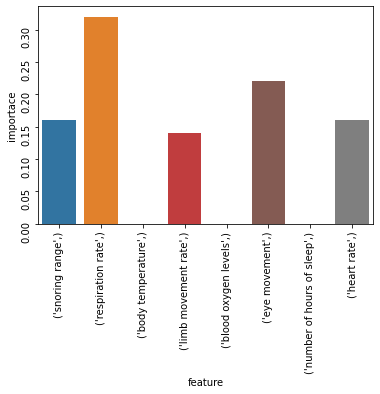

In [82]:
sns.barplot(x= Imp_feat['feature'],y = Imp_feat['importace'])
plt.tick_params(rotation =90)

In [84]:
X2 = dataset[['body temperature','blood oxygen levels','number of hours of sleep','respiration rate']]
X2.head()

,body temperature,blood oxygen levels,number of hours of sleep,respiration rate
0,91.840,89.840,1.840,25.680
1,91.552,89.552,1.552,25.104
2,96.000,95.000,7.000,20.000
3,90.768,88.768,0.768,23.536
4,97.872,96.248,8.248,17.248


In [85]:
X2.tail()

,body temperature,blood oxygen levels,number of hours of sleep,respiration rate
625,92.960,90.960,3.440,20.960
626,98.064,96.376,8.376,17.376
627,86.880,84.256,0.000,27.504
628,95.728,94.592,6.728,19.728
629,93.392,91.392,4.088,21.392


In [86]:
X2.head(2)

,body temperature,blood oxygen levels,number of hours of sleep,respiration rate
0,91.840,89.840,1.840,25.680
1,91.552,89.552,1.552,25.104


In [91]:
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y,test_size = 0.20)
X2_train.head()

,body temperature,blood oxygen levels,number of hours of sleep,respiration rate
382,92.192,90.192,2.288,20.192
81,94.112,92.168,5.112,18.112
146,98.256,96.504,8.504,17.504
612,91.184,89.184,1.184,24.368
1,91.552,89.552,1.552,25.104


In [93]:
X2_train.head(2)

,body temperature,blood oxygen levels,number of hours of sleep,respiration rate
382,92.192,90.192,2.288,20.192
81,94.112,92.168,5.112,18.112


In [94]:
Model_3 = AdaBoostClassifier()
Model_3.fit(X2_train,Y2_train)

AdaBoostClassifier()

In [95]:
print('train score',Model_3.score(X2_train,Y2_train))
print('test score',Model_3.score(X2_test,Y2_test))

train score 0.8035714285714286
test score 0.7698412698412699
